# Importing Libraries

In [ ]:
!pip --quiet install yfinance
!pip --quiet install arch
import yfinance as yf
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import statsmodels.api as sm
# from arch import arch_model
sns.set()
%matplotlib inline

import pandas_datareader.data as web
from datetime import datetime, timedelta
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Importing Libraries
import pandas as pd
import yfinance as yf
import statistics
import math
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")

     |████████████████████████████████| 6.3 MB 8.0 MB/s 
     |████████████████████████████████| 899 kB 5.2 MB/s 
     |████████████████████████████████| 9.8 MB 18.8 MB/s 


# Downloading data from Yahoo Finance

In [ ]:
start = dt.datetime(2020, 1, 1)
end = dt.datetime.now()

df = yf.download("^VIX", start=start, end=end)
df_spy = yf.download("SPY", start=start, end=end)
df=df[['Adj Close']]
df_spy=df_spy[['Adj Close']]
df = df.rename({'Adj Close': 'VIX_Close'}, axis=1)
df_spy = df_spy.rename({'Adj Close': 'SPY_Close'}, axis=1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
df.tail(5)

,VIX_Close
Date,
2021-10-12,19.850000
2021-10-13,18.639999
2021-10-14,16.860001
2021-10-18,16.309999
2021-10-19,15.700000


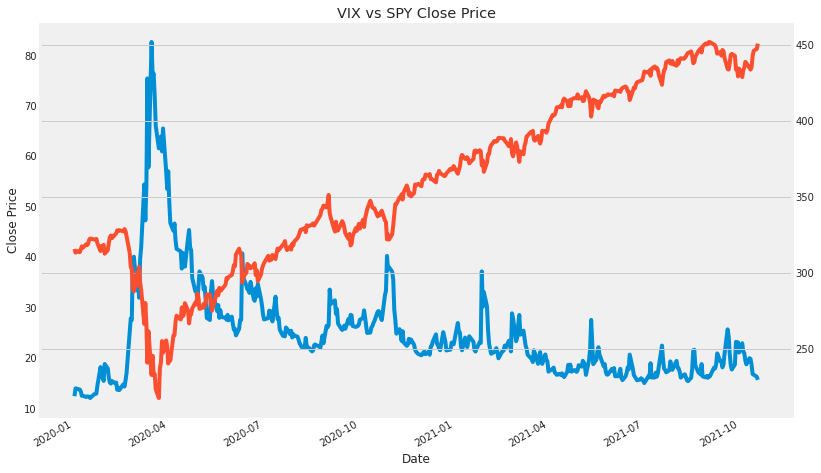

In [ ]:
df["VIX_Close"].plot(figsize=(12,8),title="VIX vs SPY Close Price",fontsize=10)
plt.ylabel('Close Price', fontsize=12)
df_spy["SPY_Close"].plot(figsize=(12,8),fontsize=10,secondary_y=True)

plt.xlabel('Date', fontsize=12)
# df["MA 20"][20:].plot(figsize=(10,5),color="Red")
plt.show()

# Calculating historical volatilities 6-month, 3-month, 1-month, or 2-week)

In [ ]:
df["Log_VIX_Close"]=np.log(df["VIX_Close"]).diff()

window_1 = 180  # days in rolling window
window_2 = 90
window_3 = 30
window_4 = 14

dpy = 252  # trading days per year

ann_factor_1 = dpy / window_1
ann_factor_2= dpy / window_2
ann_factor_3= dpy / window_3
ann_factor_4= dpy / window_4

df['real_vol_180'] = np.sqrt(df["Log_VIX_Close"].rolling(window_1).var() * ann_factor_1)
df['real_vol_90'] = np.sqrt(df["Log_VIX_Close"].rolling(window_2).var() * ann_factor_2)
df['real_vol_30'] = np.sqrt(df["Log_VIX_Close"].rolling(window_3).var() * ann_factor_3)
df['real_vol_14'] = np.sqrt(df["Log_VIX_Close"].rolling(window_4).var() * ann_factor_4)
  
# df.tail(30)


Text(0.5, 1.0, 'Historical Volatilities')

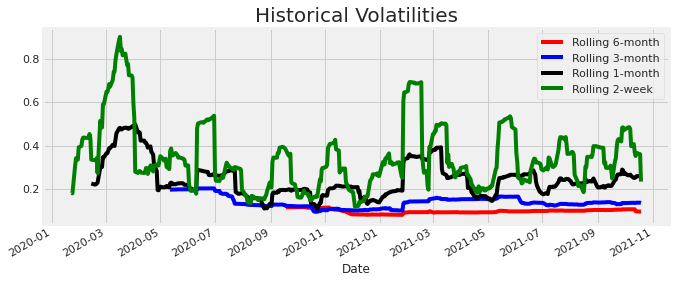

In [ ]:
plt.figure(figsize=(10,4))
df['real_vol_180'].plot(color='red')
df['real_vol_90'].plot(color='blue')
df['real_vol_30'].plot(color='black')
df['real_vol_14'].plot(color='green')
plt.legend(['Rolling 6-month', 'Rolling 3-month', 'Rolling 1-month','Rolling 2-week'])

plt.title('Historical Volatilities', fontsize=20)

In [ ]:
# returns = 100 * df.VIX_Close.pct_change()
returns = 100*(df.VIX_Close.shift(1) / df.VIX_Close - 1).dropna()


In [ ]:
# returns=np.array(returns)

Text(0.5, 1.0, 'VIX Returns')

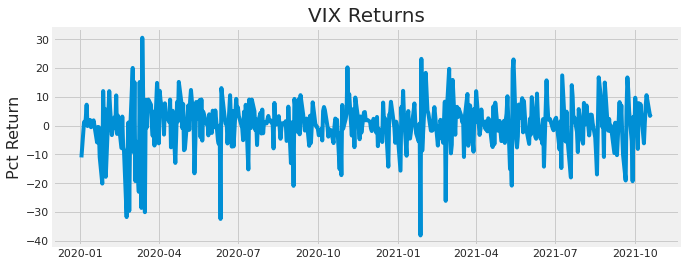

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('VIX Returns', fontsize=20)

# Determine orders of the GARCH model using partial Autocorrelation

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


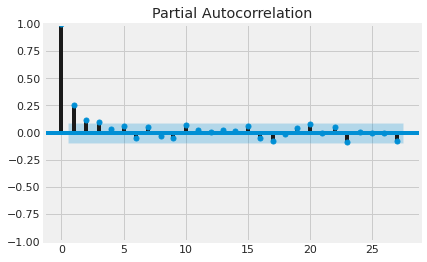

In [ ]:
plot_pacf(returns**2)
plt.show()

In [ ]:
model = arch_model(returns, mean='Zero', vol='EGARCH',p=2, q=0) #then change q to 0

# Fitting the model

In [ ]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 2371.6750463843982
Iteration:      2,   Func. Count:     14,   Neg. LLF: 2130.0626846897994
Iteration:      3,   Func. Count:     22,   Neg. LLF: 2112.403302372418
Iteration:      4,   Func. Count:     29,   Neg. LLF: 1609.5776476312858
Iteration:      5,   Func. Count:     34,   Neg. LLF: 1598.7756302315556
Iteration:      6,   Func. Count:     39,   Neg. LLF: 1589.5956131706223
Iteration:      7,   Func. Count:     44,   Neg. LLF: 1587.9489718630257
Iteration:      8,   Func. Count:     49,   Neg. LLF: 1585.1177307485164
Iteration:      9,   Func. Count:     54,   Neg. LLF: 1584.9826874749458
Iteration:     10,   Func. Count:     59,   Neg. LLF: 1584.976984940371
Iteration:     11,   Func. Count:     64,   Neg. LLF: 1584.9765647010558
Iteration:     12,   Func. Count:     69,   Neg. LLF: 1584.975228352927
Iteration:     13,   Func. Count:     74,   Neg. LLF: 1584.9728990587178
Iteration:     14,   Func. Count:     79,   Neg. LLF: 

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - EARCH Model Results                        
==============================================================================
Dep. Variable:              VIX_Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.002
Vol Model:                      EARCH   Log-Likelihood:               -1584.97
Distribution:                  Normal   AIC:                           3175.94
Method:            Maximum Likelihood   BIC:                           3188.28
                                        No. Observations:                  452
Date:                Wed, Oct 20 2021   Df Residuals:                      452
Time:                        01:52:45   Df Model:                            0
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          4.2192      0.130     32.413 1.801e-230   [  3.964,  4.474]
alpha[1]       0.3104      0.125      2.484  1.300e-02 [6.546e-02,  0.555]
alpha[2]       0.3579  9.280e-02      3.857  1.148e-04   [  0.176,  0.540]
==========================================================================

Covariance estimator: robust
"""

In [ ]:
rolling_predictions = []
predictions=[]
simulations=[]
test_size = 252

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, vol='GARCH', p=2, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    predictions.append(pred.mean.values[-1,:][0])
    simulations.append(pred.simulations)
    # predictions.append(np.sqrt(pred.values[-1,:][0]))
    rolling_predictions.append(pred.variance.values[-1][0]**0.5) 


In [ ]:
# rolling_predictions

In [ ]:
# plt.plot(rolling_predictions)

In [ ]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-252:])
# rolling_predictions

# Predictions

In [ ]:
# plt.plot(np.array(returns[-365:]))
# plt.plot(np.array(rolling_predictions))

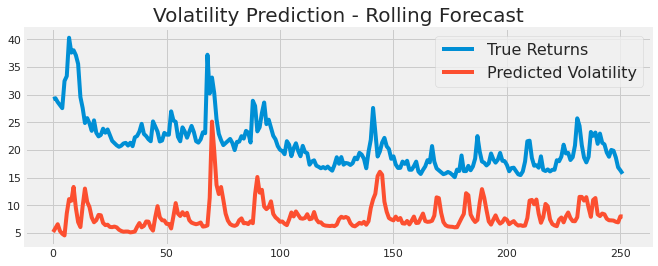

In [ ]:
plt.figure(figsize=(10,4))
# true, = plt.plot(np.array(returns[-252:]))
true, = plt.plot(np.array(df.VIX_Close[-252:]))
preds, = plt.plot(np.array((rolling_predictions)))
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

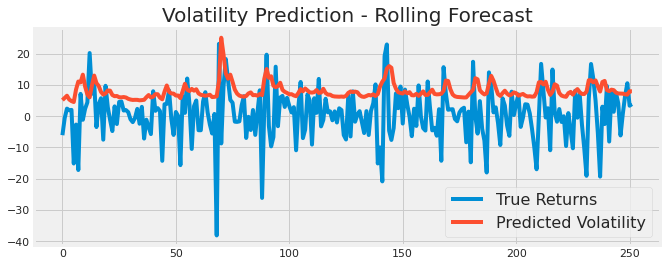

In [ ]:
plt.figure(figsize=(10,4))
true, = plt.plot(np.array(returns[-252:]))
# true, = plt.plot(np.array(df.VIX_Close[-252:]))
preds, = plt.plot(np.array((rolling_predictions)))
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

In [ ]:
daily_return = rolling_predictions.pct_change(1)
daily_return[0]=0
daily_return

Date
2020-10-19    0.000000
2020-10-20    0.137037
2020-10-21    0.119104
2020-10-22   -0.185721
2020-10-23   -0.093993
                ...   
2021-10-12   -0.005823
2021-10-13   -0.029705
2021-10-14   -0.014233
2021-10-18    0.156967
2021-10-19   -0.003104
Length: 252, dtype: float64

Text(0.5, 1.0, 'Daily Return Prediction - Rolling Forecast')

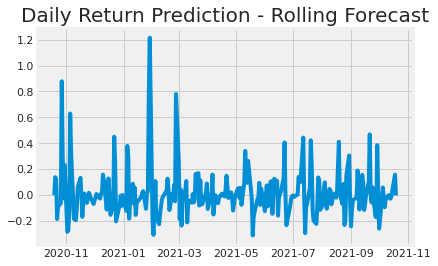

In [ ]:
plt.plot(daily_return)
plt.title('Daily Return Prediction - Rolling Forecast', fontsize=20)

In [ ]:
#we predict the next day's VIX value using today's value and predicted daily_return
VIXhist = df.VIX_Close[-252:]
VIXhist

Date
2020-10-19    29.180000
2020-10-20    29.350000
2020-10-21    28.650000
2020-10-22    28.110001
2020-10-23    27.549999
                ...    
2021-10-12    19.850000
2021-10-13    18.639999
2021-10-14    16.860001
2021-10-18    16.309999
2021-10-19    15.700000
Name: VIX_Close, Length: 252, dtype: float64

In [ ]:
1+np.array(daily_return)

array([1.        , 1.13703742, 1.11910378, 0.81427856, 0.90600703,
       0.93832379, 1.87828176, 1.30051258, 0.97271575, 1.2318754 ,
       0.7147805 , 0.73070912, 0.87017582, 1.62892137, 1.32079446,
       0.81472044, 0.91285051, 0.80480655, 0.88863621, 1.05380436,
       1.13187467, 0.99190733, 0.83049113, 0.94243203, 1.01098754,
       0.93842204, 0.99386872, 1.01647956, 0.97607874, 0.93028817,
       0.95835035, 0.97575467, 1.00668416, 0.99849879, 0.97187826,
       1.01149792, 1.02040877, 1.15713336, 1.11379514, 0.88665998,
       1.04307807, 1.12735067, 0.99543499, 0.84619009, 0.91014811,
       1.44974026, 1.25251362, 0.79590413, 0.93023295, 0.99460504,
       0.91519838, 0.99941631, 0.87581033, 1.37850122, 1.29808546,
       0.81689721, 0.94938503, 1.08632781, 0.93405282, 1.05603188,
       0.84538316, 0.93937197, 0.9766426 , 0.98095751, 1.01806822,
       1.02883986, 0.89286463, 1.00914892, 1.02551223, 1.78409285,
       2.2148722 , 0.78732646, 0.6917114 , 0.87844444, 1.10691

In [ ]:
np.array(VIXhist)

In [ ]:
import numpy as np
VIXpred = np.multiply((1+np.array(daily_return)), (np.array(VIXhist)))


In [ ]:
VIXpred

array([29.18000031, 33.37204857, 32.06232275, 22.88937082, 24.96049307,
       30.45798945, 62.64069379, 52.38464507, 36.56438518, 46.83590322,
       26.53980084, 25.97670875, 25.73109869, 44.9256513 , 32.8349512 ,
       20.97905125, 22.63869189, 18.8727143 , 22.52692818, 24.34288109,
       25.41058725, 22.5262146 , 19.79890875, 21.7796047 , 23.96040538,
       21.26464334, 21.50731846, 21.60019068, 20.34148119, 19.13602737,
       19.90493714, 20.65672649, 21.42223965, 20.75879073, 20.70100619,
       20.91777738, 22.72450386, 26.05864375, 25.96256412, 21.91823408,
       23.8760565 , 25.36539014, 21.82988959, 18.25232006, 22.89932638,
       35.12720587, 29.19609183, 17.13581648, 20.18605582, 22.95548428,
       20.83906753, 22.73672098, 23.62060407, 34.93122103, 32.54300208,
       18.27399119, 20.46874082, 26.15877364, 21.79145222, 23.45446699,
       19.65515851, 22.86431381, 22.69717383, 21.16906307, 21.70521424,
       22.54188123, 20.70553121, 23.23060849, 38.15930909, 53.89

In [ ]:
VIXpred

array([29.18000031, 33.37204857, 32.06232275, 22.88937082, 24.96049307,
       30.45798945, 62.64069379, 52.38464507, 36.56438518, 46.83590322,
       26.53980084, 25.97670875, 25.73109869, 44.9256513 , 32.8349512 ,
       20.97905125, 22.63869189, 18.8727143 , 22.52692818, 24.34288109,
       25.41058725, 22.5262146 , 19.79890875, 21.7796047 , 23.96040538,
       21.26464334, 21.50731846, 21.60019068, 20.34148119, 19.13602737,
       19.90493714, 20.65672649, 21.42223965, 20.75879073, 20.70100619,
       20.91777738, 22.72450386, 26.05864375, 25.96256412, 21.91823408,
       23.8760565 , 25.36539014, 21.82988959, 18.25232006, 22.89932638,
       35.12720587, 29.19609183, 17.13581648, 20.18605582, 22.95548428,
       20.83906753, 22.73672098, 23.62060407, 34.93122103, 32.54300208,
       18.27399119, 20.46874082, 26.15877364, 21.79145222, 23.45446699,
       19.65515851, 22.86431381, 22.69717383, 21.16906307, 21.70521424,
       22.54188123, 20.70553121, 23.23060849, 38.15930909, 53.89

## Strategy

In [ ]:
df=yf.download("^VIX",start="2020-10-19",progress=False)
df["SMA20"]=df["Close"].rolling(20).mean()
df["STD"]=df["Close"].rolling(20).std()
df["BB_Upper"]=df["SMA20"]+(2*df["STD"])  # 2 STD 
df["BB_Lower"]=df["SMA20"]-(2*df["STD"]) # 2 

df["VIXpred"]=VIXpred
df

,Open,High,Low,Close,Adj Close,Volume,SMA20,STD,BB_Upper,BB_Lower,VIXpred
Date,,,,,,,,,,,
2020-10-19,27.360001,29.690001,27.040001,29.180000,29.180000,0,NaN,NaN,NaN,NaN,29.180000
2020-10-20,28.809999,29.600000,28.290001,29.350000,29.350000,0,NaN,NaN,NaN,NaN,33.372049
2020-10-21,29.120001,30.549999,28.370001,28.650000,28.650000,0,NaN,NaN,NaN,NaN,32.062323
2020-10-22,30.100000,30.120001,27.680000,28.110001,28.110001,0,NaN,NaN,NaN,NaN,22.889371
2020-10-23,28.469999,28.670000,27.260000,27.549999,27.549999,0,NaN,NaN,NaN,NaN,24.960493
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-12,20.620001,20.809999,18.969999,19.850000,19.850000,0,20.8615,2.213271,25.288043,16.434957,19.734408
2021-10-13,20.139999,20.230000,18.440001,18.639999,18.639999,0,20.8845,2.186163,25.256826,16.512174,18.086296
2021-10-14,18.010000,18.080000,16.799999,16.860001,16.860001,0,20.7930,2.317215,25.427429,16.158570,16.620031


In [ ]:
returns = 100*df['Adj Close'].pct_change().dropna()
print(len(returns))

251


In [ ]:
len(df["Close"])

252

In [ ]:
# Execute the strategy and create a Log
signal=0
df_log=pd.DataFrame()
cash=10000
cash_data=[cash]
budget=cash
Buy, Sell = [],[]
for i in range(len(df)):
    if df["VIXpred"].iloc[i]<df["BB_Lower"].iloc[i] and signal==0:
        Buy.append(i)
        signal+=1
        maximo=math.trunc(cash/df["Close"].iloc[i])
        comission=0.01*(maximo*df["Open"].iloc[i+1])
        cash-= maximo*df["Open"].iloc[i+1]-comission
        price=(df["Open"].iloc[i+1])
        # Creating Log
        a_row=pd.Series(["Buy",df.index[i+1],price,maximo,price*maximo,comission])
        row_df=pd.DataFrame([a_row])
        df_log = pd.concat([row_df, df_log], ignore_index=True)
    if df["VIXpred"].iloc[i]>df["BB_Upper"].iloc[i] and signal ==1:
        Sell.append(i)
        signal-=1
        comission=0.01*(maximo*df["Open"].iloc[i+1])
        cash+=maximo*df["Open"].iloc[i+1]-comission
        cash_data.append(cash)
        price=(df["Open"].iloc[i+1])
        a_row=pd.Series(["Sell",df.index[i+1],price,maximo,price*maximo,comission])
        row_df=pd.DataFrame([a_row])
        df_log = pd.concat([row_df, df_log], ignore_index=True)   
# you can  only buy an asset in the next signal day opening

In [ ]:
df_log

,0,1,2,3,4,5
0,Sell,2021-09-09,19.440001,1624,31570.560867,315.705609
1,Buy,2021-09-02,16.270000,1624,26422.480743,264.224807
2,Sell,2021-08-31,15.980000,1707,27277.859219,272.778592
3,Buy,2021-08-26,17.459999,1707,29804.218437,298.042184
4,Sell,2021-08-19,23.120001,1301,30079.121092,300.791211
5,Buy,2021-07-27,18.620001,1301,24224.621092,242.246211
6,Sell,2021-07-20,20.889999,1117,23334.129318,233.341293
7,Buy,2021-07-15,16.700001,1117,18653.900852,186.539009
8,Sell,2021-07-09,17.879999,1025,18326.999140,183.269991
9,Buy,2021-06-25,16.040001,1025,16441.000938,164.410009


In [ ]:
df_log=df_log.rename(columns={0:"Type",1:"Date",2:"Price",3:"Shares",4:"Amount",5:"Comission"})
# df_log=df_log.set_index("Date")
df_log=df_log.iloc[::-1]
df_log

,Type,Date,Price,Shares,Amount,Comission
19,Buy,2020-12-21,24.250000,463,11227.750000,112.277500
18,Sell,2020-12-23,23.490000,463,10875.869894,108.758699
17,Buy,2020-12-28,22.110001,448,9905.280273,99.052803
16,Sell,2021-01-06,25.480000,448,11415.039795,114.150398
15,Buy,2021-01-08,22.430000,498,11170.140152,111.701402
14,Sell,2021-01-28,33.250000,498,16558.500000,165.585000
13,Buy,2021-03-11,22.500000,730,16425.000000,164.250000
12,Sell,2021-05-04,18.160000,730,13256.799889,132.567999
11,Buy,2021-05-10,17.340000,799,13854.660122,138.546601
10,Sell,2021-05-11,21.170000,799,16914.830061,169.148301


In [ ]:
# Eliminating Open Positions
Buyprices=df["Open"].iloc[Buy]
Sellprices=df["Open"].iloc[Sell]

if Buyprices.index[-1]>Sellprices.index[-1]:
    cash+=maximo*Buyprices[-1]
    Buyprices=Buyprices.drop(Buyprices.index[-1])
    df_log=df_log[:-1]
    del cash_data[-1]
df_log

,Type,Date,Price,Shares,Amount,Comission
19,Buy,2020-12-21,24.250000,463,11227.750000,112.277500
18,Sell,2020-12-23,23.490000,463,10875.869894,108.758699
17,Buy,2020-12-28,22.110001,448,9905.280273,99.052803
16,Sell,2021-01-06,25.480000,448,11415.039795,114.150398
15,Buy,2021-01-08,22.430000,498,11170.140152,111.701402
14,Sell,2021-01-28,33.250000,498,16558.500000,165.585000
13,Buy,2021-03-11,22.500000,730,16425.000000,164.250000
12,Sell,2021-05-04,18.160000,730,13256.799889,132.567999
11,Buy,2021-05-10,17.340000,799,13854.660122,138.546601
10,Sell,2021-05-11,21.170000,799,16914.830061,169.148301


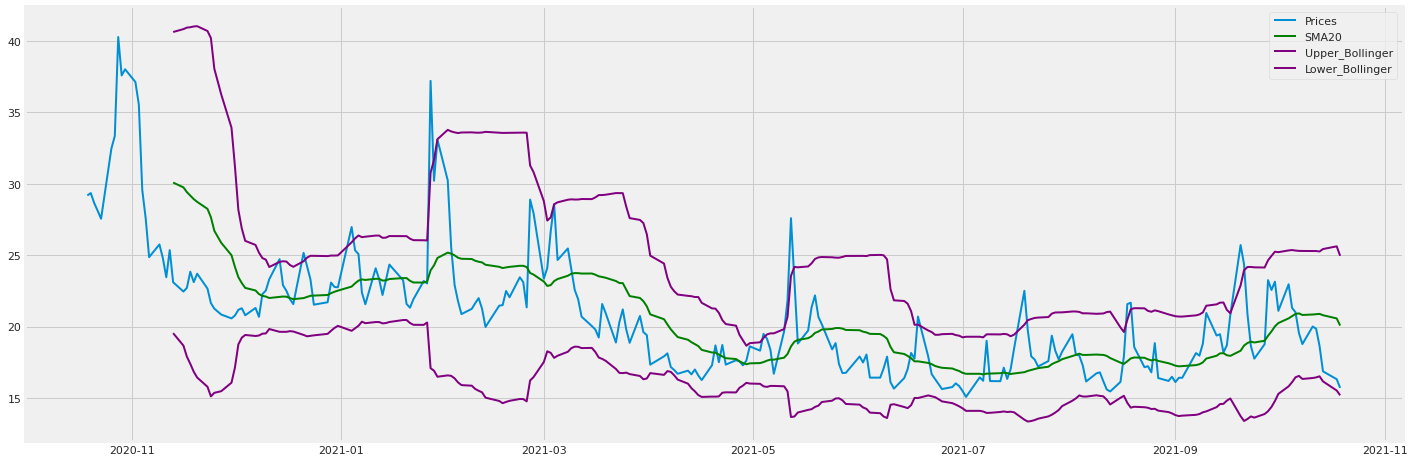

In [ ]:
plt.figure(figsize=(22,8))
plt.plot(df["Adj Close"],linewidth=2,label="Prices")
plt.plot(df["SMA20"],linewidth=2,label="SMA20", color="green")
plt.plot(df["BB_Upper"],linewidth=2,label="Upper_Bollinger",color="purple")
plt.plot(df["BB_Lower"],linewidth=2,label="Lower_Bollinger", color="purple")
plt.legend()
plt.show()

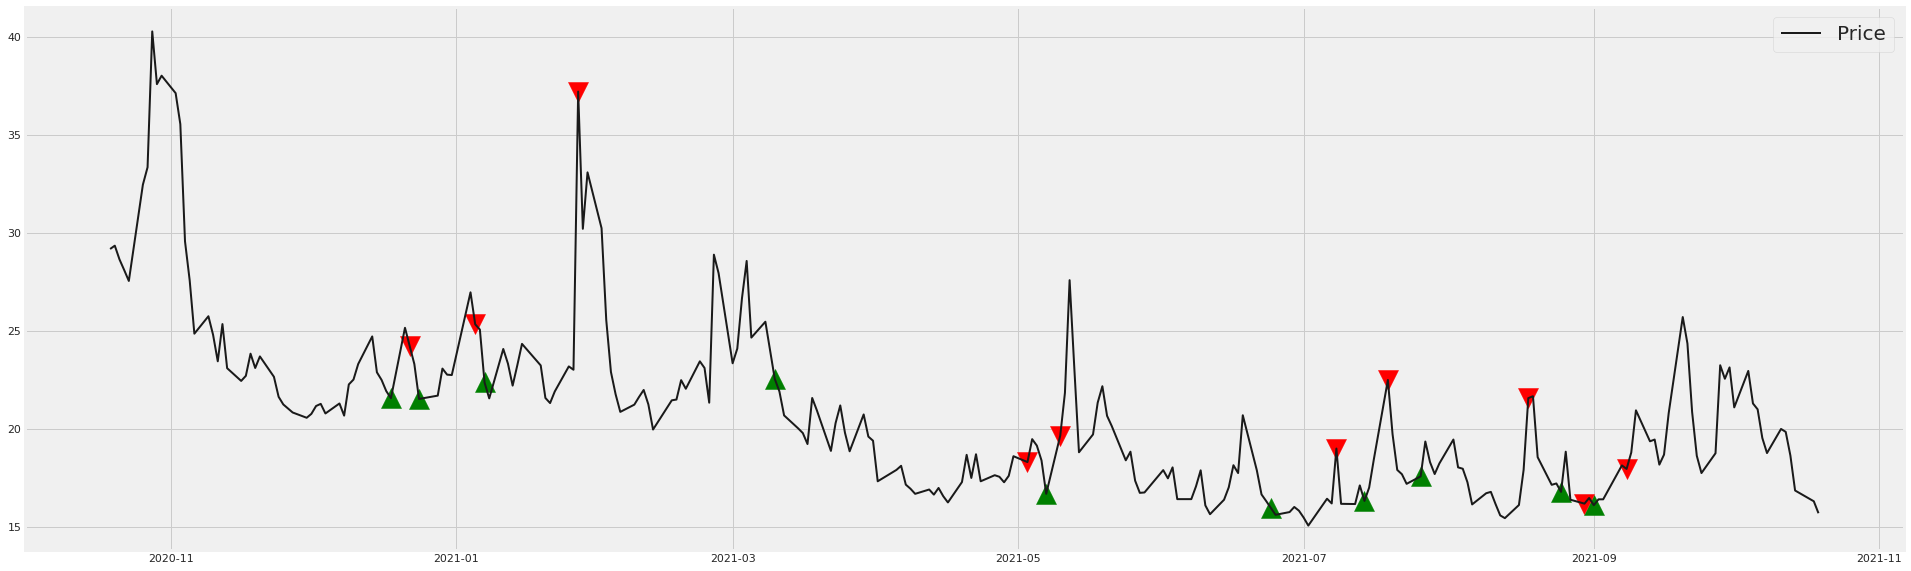

In [ ]:
plt.figure(figsize=(30,10))
plt.scatter(df.iloc[Buy].index, df.iloc[Buy]["Adj Close"], marker="^", color="green",s=400)
plt.scatter(df.iloc[Sell].index, df.iloc[Sell]["Adj Close"], marker="v", color="red",s=400)
plt.plot(df["Adj Close"], label="Price", color="k",linewidth =2)
# if you want to see bollinger bands, retire the hashtag before the next lines
#plt.plot(df["SMA20"],linewidth=2,label="SMA20", color="green")
#plt.plot(df["BB_Upper"],linewidth=2,label="Upper_Bollinger",color="purple")
#plt.plot(df["BB_Lower"],linewidth=2,label="Lower_Bollinger", color="purple")
#
plt.legend(fontsize=20)
plt.show()

<Figure size 1584x576 with 0 Axes>

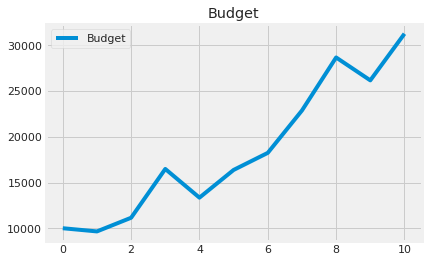

In [ ]:
plt.figure(figsize=(22,8))
cash_data=pd.DataFrame(pd.Series(cash_data))
cash_data=cash_data.rename(columns={0:"Budget"})
maximum_loss=min(cash_data["Budget"])
cash_data.plot(title="Budget")

In [ ]:
B_H=(df["Close"][-1]-df["Close"][0])/df["Close"][0]
B_H
retorno = (cash-budget)/budget
print(f"Initial Cash: ${budget:.2f}")
print(f"Final Cash: ${cash:.2f}")
print(f"Strategy: {retorno*100:.2f}%")
print(f"Simple Buy & Hold Strategy: {B_H*100:.2f}%")
print(f"Maximum Drawdown: {(maximum_loss-budget)/budget*100:.2f}%")

Initial Cash: $10000.00
Final Cash: $31265.85
Strategy: 212.66%
Simple Buy & Hold Strategy: -46.20%
Maximum Drawdown: -3.48%
